In [1]:
import pandas as pd
import numpy as np
# Libraries for Text Preprocessing
import re
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn import metrics

tokenizer=Tokenizer()

In [2]:
# test_list_single = ['fasilitas lengkap seperti bintang lima', 
#                     'aneh banget',
#                     'pelayanan sopan ramah',
#                     'pelayanan cekatan',
#                     'lobi terlalu kecil tidak nyaman',
#                     'makanan dan minuman sarapan pagi enak enak',
#                     'lokasi strategis dekat pusat kota',
#                     'suasan sejuk pedasaan',
#                     'kamar agak sempit',
#                     'hotel ini menawarkan harga yang terjangkau',
#                     'harga menginap semalam dikamar vip murah',
#                     'harga mahal tidak sesuai',
#                     'hotel bagus sesuai harga',
#                     'harga ekonomis dan ada promo banyak',
#                     'hotel ini menawarkan harga yang sangat terjangkau dibandingkan dengan hotel sejenis di sekitarnya',
#                    ]
data_validation = pd.read_excel('validation_1_aspect.xlsx')
data_validation.tail()

# data_set_2 = pd.DataFrame({'text': test_list_single})
# data_set_2.head(16)

,text,makanan,fasilitas,pelayanan,kamar,harga,lokasi
54,"makanannya kurang enak, tapi overall good",1.0,0.0,0.0,0.0,0.0,0.0
55,Tempat makan nya agak sempit tapi makanan nya ...,1.0,0.0,0.0,0.0,0.0,0.0
56,Makanannya enak dan bervariasi,1.0,0.0,0.0,0.0,0.0,0.0
57,sarapannya variatif dan enak,1.0,0.0,0.0,0.0,0.0,0.0
58,Makanan enak & bervariasi. Recomended hotel !!!,1.0,0.0,0.0,0.0,0.0,0.0


In [3]:
import neattext.functions as nfx

def cleaning(text):
    text = re.sub(r'\n',' ',text) # Hapus \n (enter)
    text = nfx.remove_hashtags(text) # Hapus hashtags
    text = nfx.remove_numbers(text) # Hapus number
    text = text.strip() # Hapus Whitespace
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) # Hapus karakter selain alfabet dan angka
    return text

def casefolding(text):
    return text.lower()

data_validation['content_cleaned'] = data_validation['text'].apply(cleaning).apply(casefolding)

data_validation.head()

,text,makanan,fasilitas,pelayanan,kamar,harga,lokasi,content_cleaned
0,"pelayanan seperti bintang lima,",0.0,0.0,1.0,0.0,0.0,0.0,pelayanan seperti bintang lima
1,lobi hotel luas dan megah,0.0,1.0,0.0,0.0,0.0,0.0,lobi hotel luas dan megah
2,pelayanan sopan ramah,0.0,0.0,1.0,0.0,0.0,0.0,pelayanan sopan ramah
3,"pelayanan cekatan',",0.0,0.0,1.0,0.0,0.0,0.0,pelayanan cekatan
4,"menu makanan lengkap',",1.0,0.0,0.0,0.0,0.0,0.0,menu makanan lengkap


In [4]:
from keras.models import load_model

tokenizer.fit_on_texts(data_validation['content_cleaned'])
X=tokenizer.texts_to_sequences(data_validation['content_cleaned'])
X=pad_sequences(X, maxlen=31, padding='post')

threshold = 0.5
prediction_result = []
model = load_model('aspek_fasilitas.h5')

predictions_label = model.predict(X)
predictions_label = tf.where(predictions_label < threshold, 0, 1)

for result in predictions_label:
    prediction_result.append(result[0].numpy())

print(prediction_result)

[1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0]


       False  True
False     14     6
True      34     5


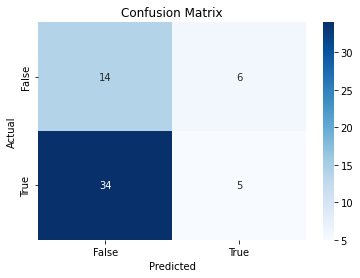

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data = data_validation['makanan'].tolist()
actual_aspect = [int(x) for x in data]

# Membuat confusion matrix
confusion_mat = confusion_matrix(prediction_result, actual_aspect)

confusion_df = pd.DataFrame(confusion_mat, index=['False', 'True'], columns=['False', 'True'])
print(confusion_df)

# Visualisasi confusion matrix
sns.heatmap(confusion_df, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [6]:
y_pred = np.array(prediction_result)
y_true = np.array(actual_aspect)

F1_score = metrics.f1_score(y_true, y_pred)
print("F1_score harga" ,F1_score)

F1_score harga 0.19999999999999996


In [7]:
# from keras.models import load_model

# # model_filenames = ['aspek_harga.h5', 'aspek_makanan.h5', 'aspek_kamar.h5', 'aspek_pelayanan.h5']  # List of models
# model_filenames = ['aspek_harga.h5']  # List of models
# models = []
# for filename in model_filenames:
#     model = load_model(filename)
#     models.append(model)


# # Lakukan prediksi pada seluruh data test menggunakan setiap model
# predictions = np.zeros((X_validasi.shape[0], len(models)))

# for i, model in enumerate(models):
#     preds = model.predict(X_validasi)
#     preds_binary = np.where(preds > 0.5, 1, 0)
#     for j, pred in enumerate(preds_binary):
#         predictions[j][i] = pred[0]
        
# prediction_aspect_result = predictions.astype(int)
        
# # predictions.dtype
# print(prediction_aspect_result)
# print(data_set_2['text'])

In [8]:
# actual_aspek = [[0],[0],[0],[0],[0],[0],[0],[0],[0],[1],[1],[1],[1],[1],[1]]

# y_pred = np.array(prediction_aspect_result)
# y_true = np.array(actual_aspek)

# F1_score = metrics.f1_score(y_true, y_pred)
# print("F1_score harga" ,F1_score)